In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Importing the necessary data
data = np.genfromtxt('data/data_yerr.dat', delimiter='&', skip_header=1)

x = data[:, 1]
y = data[:, 2]
dy = data[:, 3]


In [48]:
# Proposed moves using a Guassian distribution
def proposal(current, sigma_X=0.05, sigma_Y=2.0):
    X_new = np.random.normal(current[0], sigma_X)
    Y_new = np.random.normal(current[1], sigma_Y)
    return np.array([X_new, Y_new])

In [49]:
def log_likelihood(X, Y, x, y, dy):
    model = X * x + Y
    return -0.5 * np.sum(((y - model) / dy)**2)


In [50]:
def metropolis_sampler(log_likelihood, initial, n_steps, x, y, dy):
    current = np.array(initial)
    chain = [current]
    current_logp = log_likelihood(*current, x, y, dy)

    for _ in range(n_steps):
        proposed = proposal(current)
        proposed_logp = log_likelihood(*proposed, x, y, dy)
        
        # Accept/reject
        if np.log(np.random.rand()) < proposed_logp - current_logp:
            current = proposed
            current_logp = proposed_logp
        
        chain.append(current)

    return np.array(chain)

In [51]:
np.random.seed(10)
initial_guess = [0.0, 0.0] 
chain = metropolis_sampler(log_likelihood, initial_guess, 10000, x, y, dy)


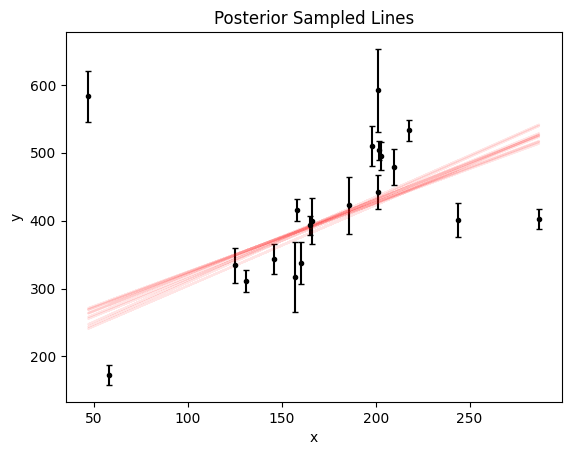

In [52]:
plt.errorbar(x, y, yerr=dy, fmt=".k", capsize=2)
for X, Y in chain[-1000::100]: 
    plt.plot(x, X * x + Y, color='r', alpha=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Posterior Sampled Lines");
